---
---

#**MACHINE LEARNING: ALGORITMOS NO SUPERVISADOS**
Docente: Paulette N. Reyes Baeza

<img src='https://cdn-icons-png.flaticon.com/512/25/25231.png' width=3%>   [Github](https://github.com/paulette-reyes)

---
---

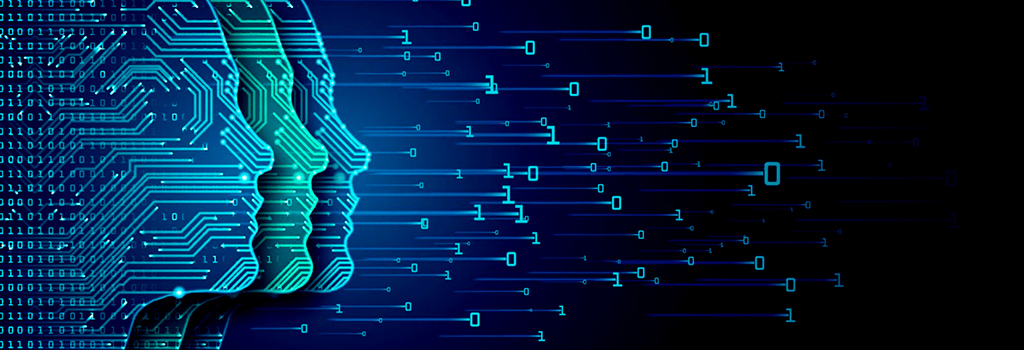

# **1. ENTENDIMIENTO DEL PROBLEMA**

**Dataset:**

Conjunto de datos de C√°ncer de Mama de Wisconsin. Contiene 569 registros compuestos por 32 atributos (incluyendo el diagn√≥stico y un n√∫mero de identificaci√≥n). Todos los atributos est√°n estrictamente relacionados con propiedades biol√≥gicas y morfol√≥gicas de los tumores.

FUENTE: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic


**Objetivo:**

> Validar hip√≥tesis de clasificaci√≥n benigna o maligna de los tumores a trav√©s de la creaci√≥n de clusters.

**Desarrollo:**

‚û°Ô∏è Utilice algoritmos no supervisados para encontrar patrones en los datos.

‚û°Ô∏è Realice un an√°lisis de cluster (conglomerados)




---



‚úÖ Importar librer√≠as b√°sicas

In [ ]:
#Librer√≠as de Python

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import warnings #Advertencias
warnings.filterwarnings('ignore')

‚úÖ Cargar archivo

In [ ]:
bc_dataset_path = 'wdbc.data'

bc_dataset_columns = ['id','diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
 'radius_se','texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst',
 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

df = pd.read_csv(bc_dataset_path, index_col=0, names=bc_dataset_columns).fillna(0.0)

# **2. AN√ÅLISIS EXPLORATORIO**

In [ ]:
df.shape

(569, 31)

In [ ]:
df.sample(10)

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                                                                         
905190           B       12.850         21.37           82.63      514.5   
924632           B       12.880         28.92           82.50      514.3   
895299           B       12.030         17.93           76.09      446.0   
864685           B       11.930         21.53           76.53      438.6   
853201           M       17.570         15.05          115.00      955.1   
90769601         B       11.130         16.62           70.47      381.1   
8911834          B       13.850         15.18           88.99      587.4   
917092           B        9.295         13.90           59.96      257.8   
926954           M       16.600         28.08          108.30      858.1   
894326           M       18.220         18.87          118.70     1027.0   

          smoothness_mean  compactness_mean  concavity_mean  \
id                                                            
905190            0.07551           0.08316        0.061260   
924632            0.08123           0.05824        0.061950   
895299            0.07683           0.03892        0.001546   
864685            0.09768           0.07849        0.033280   
853201            0.09847           0.11570        0.098750   
90769601          0.08151           0.03834        0.013690   
8911834           0.09516           0.07688        0.044790   
917092            0.13710           0.12250        0.033320   
926954            0.08455           0.10230        0.092510   
894326            0.09746           0.11170        0.113000   

          concave points_mean  symmetry_mean  ...  radius_worst  \
id                                            ...                 
905190               0.018670         0.1580  ...         14.40   
924632               0.023430         0.1566  ...         13.89   
895299               0.005592         0.1382  ...         13.07   
864685               0.020080         0.1688  ...         13.67   
853201               0.079530         0.1739  ...         20.01   
90769601             0.013700         0.1511  ...         11.68   
8911834              0.037110         0.2110  ...         14.98   
917092               0.024210         0.2197  ...         10.57   
926954               0.053020         0.1590  ...         18.98   
894326               0.079500         0.1807  ...         21.84   

          texture_worst  perimeter_worst  area_worst  smoothness_worst  \
id                                                                       
905190            27.01            91.63       645.8           0.09402   
924632            35.74            88.84       595.7           0.12270   
895299            22.25            82.74       523.4           0.10130   
864685            26.15            87.54       583.0           0.15000   
853201            19.52           134.90      1227.0           0.12550   
90769601          20.29            74.35       421.1           0.10300   
8911834           21.74            98.37       670.0           0.11850   
917092            17.84            67.84       326.6           0.18500   
926954            34.12           126.70      1124.0           0.11390   
894326            25.00           140.90      1485.0           0.14340   

          compactness_worst  concavity_worst  concave points_worst  \
id                                                                   
905190              0.19360         0.183800               0.05601   
924632              0.16200         0.243900               0.06493   
895299              0.07390         0.007732               0.02796   
864685              0.23990         0.150300               0.07247   
853201              0.28120         0.248900               0.14560   
90769601            0.06219         0.045800               0.04044   
8911834             0.17240         0.145600               0.09993   
917092         

Clasificaci√≥n de los tumores

In [ ]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [ ]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

Las desviaciones est√°ndar var√≠an desde 0.01 hasta 350, lo que significa que muchos vectores podr√≠an ser extremadamente similares solo debido a uno o dos atributos. Por otro lado, normalizar el valor con una escala de varianza dar√° a todos los atributos la misma responsabilidad (por ejemplo, "area_mean" est√° limitada entre 143.5 y 2501, mientras que "smoothness_mean" est√° limitada entre 0.05 y 0.16). Forzarlos a tener la misma varianza puede influir en el impacto biol√≥gico de los factores y, como no tenemos ninguna indicaci√≥n espec√≠fica, no podemos tomar tal decisi√≥n.

Claramente, algunos atributos tendr√°n un peso mayor en el proceso de agrupamiento y aceptamos su influencia como una condici√≥n relacionada con el contexto.

Para el an√°lisis preliminar tomamos las variables "perimeter_mean," "area_mean," "smoothness_mean," "concavity_mean," y "symmetry_mean".

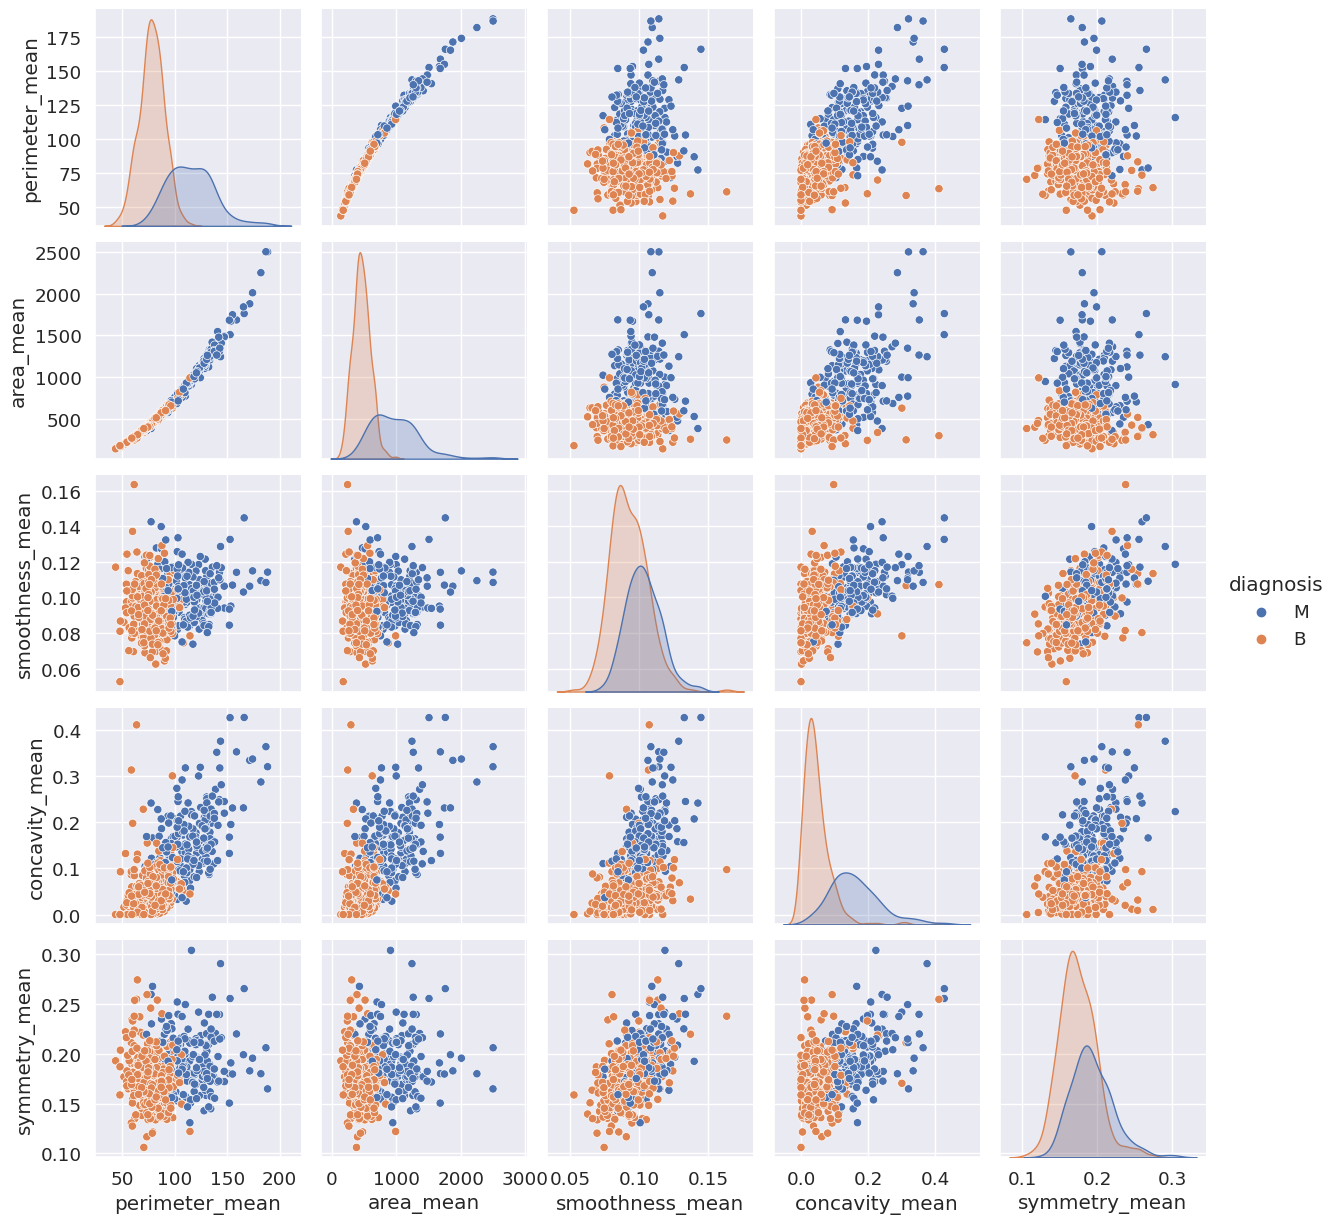

In [ ]:
# Pair-plot
sns.set()

with sns.plotting_context("notebook", font_scale=1.2):
  sns.pairplot(df,
               vars=['perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'symmetry_mean'],
               hue="diagnosis")
plt.show()


El par de gr√°ficos (pair-plot) muestra cada atributo no diagonal como una funci√≥n de todos los dem√°s, mientras que los gr√°ficos diagonales representan las distribuciones de cada atributo dividido en dos componentes (en este caso, el diagn√≥stico). Por lo tanto, el segundo gr√°fico no diagonal (arriba a la izquierda) es el diagrama de "perimeter_mean" como funci√≥n de "area_mean," y as√≠ sucesivamente.

Descubrimientos:

*   "area_mean" y "perimeter_mean" tienen una clara correlaci√≥n y determinan una separaci√≥n n√≠tida. Cuando "area_mean" es mayor que aproximadamente 1.000, obviamente tambi√©n el "perimeter" aumenta y el diagn√≥stico cambia abruptamente de tumor benigno a maligno. Por lo tanto, estos dos atributos son determinantes para el resultado final y es probable que uno de ellos sea redundante.

*   Otros gr√°ficos (por ejemplo, "perimeter_mean/area_mean" versus "smoothness_mean," "area_mean" versus "symmetry_mean," "concavity_mean" versus "smoothness_mean," y "concavity_mean" versus "symmetry_mean") tienen una separaci√≥n horizontal (que se convierte en vertical invirtiendo el eje). Esto significa que, para casi todos los valores asumidos por la variable independiente (eje x), hay un umbral que separa los valores de la otra variable en dos conjuntos (benignos y malignos).

*   Algunos gr√°ficos (por ejemplo, "perimeter_mean/area_mean" versus "concavity_mean/concavity_mean" versus "symmetry_mean") muestran una ligera separaci√≥n diagonal con pendiente negativa. Esto significa que cuando la variable independiente es peque√±a, el diagn√≥stico permanece constante para casi todos los valores de la variable dependiente, mientras que, por otro lado, cuando la variable independiente se vuelve cada vez m√°s grande, el diagn√≥stico cambia proporcionalmente al valor opuesto. Por ejemplo, para valores peque√±os de "perimeter_mean," "concavity_mean" puede alcanzar su m√°ximo sin afectar el diagn√≥stico (que es benigno), mientras que un "perimeter_mean" > 150 siempre arroja un diagn√≥stico maligno independientemente de "concavity_mean."

Estas observaciones son valiosas para comprender las relaciones entre los atributos y c√≥mo influyen en el diagn√≥stico de benignidad o malignidad de los tumores.

In [ ]:
from sklearn.manifold import TSNE

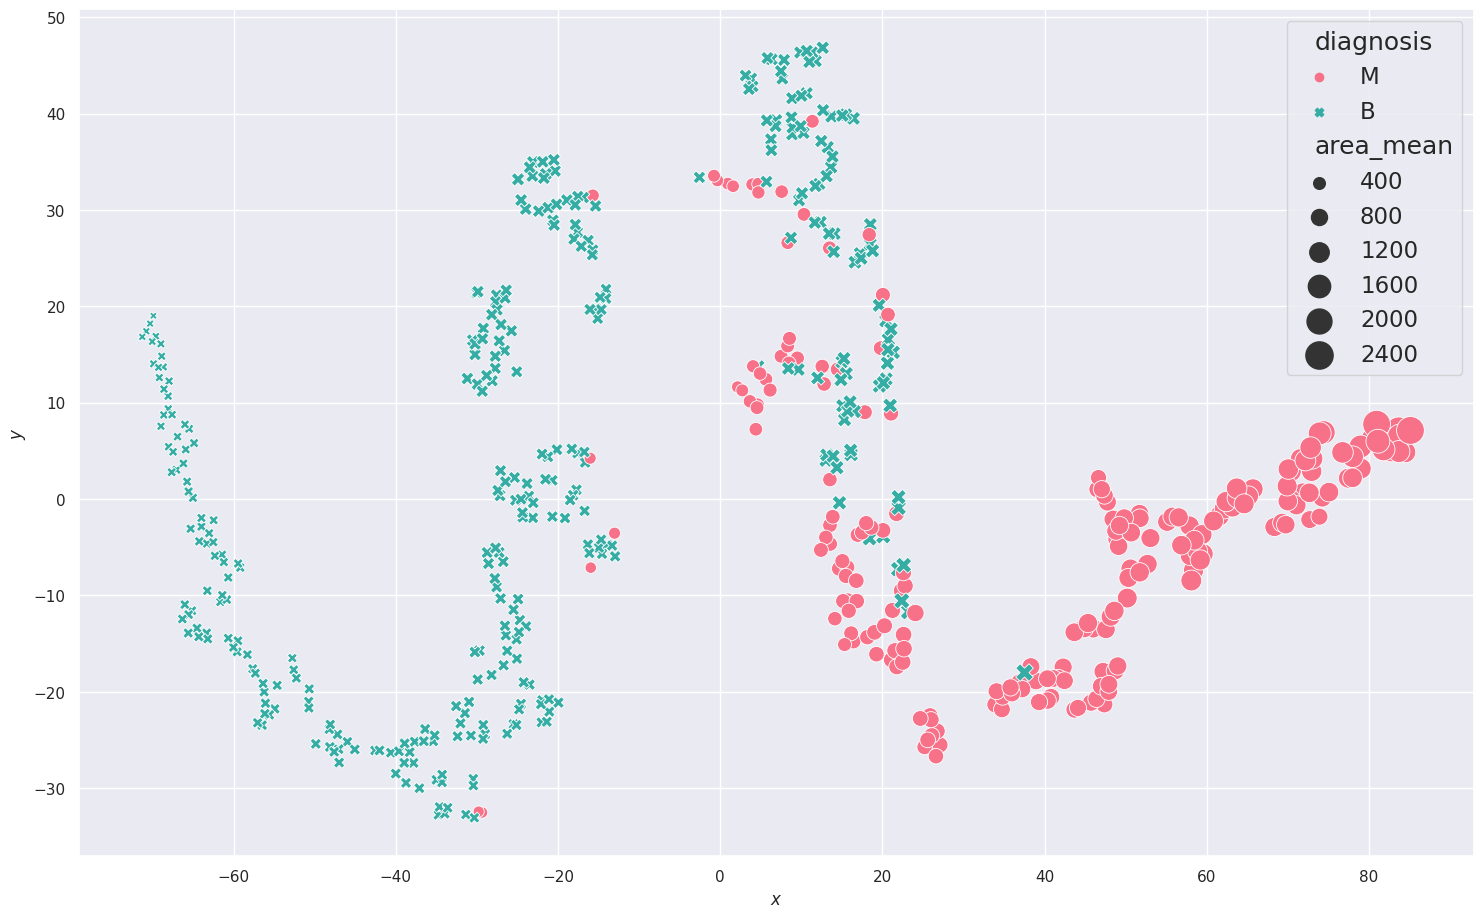

In [ ]:
#Proyectar el conjunto de datos en un plano bidimensional
cdf = df.drop(['diagnosis'], axis=1)

tsne = TSNE(n_components=2, perplexity=10, random_state=1000)
data_tsne = tsne.fit_transform(cdf)

df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=cdf.index)
dff = pd.concat([df, df_tsne], axis=1)

#Diagrama
fig, ax = plt.subplots(figsize=(18, 11))

with sns.plotting_context("notebook", font_scale=1.5):
                        sns.scatterplot(x='x',
                        y='y',
                        hue='diagnosis',
                        size='area_mean',
                        style='diagnosis',
                        sizes=(30, 400),
                        palette=sns.color_palette("husl", 2),
                        data=dff,
                        ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

El diagrama es altamente no lineal, pero la mayor√≠a de las muestras malignas se encuentran en la mitad del plano donde y < 0. Desafortunadamente, tambi√©n un porcentaje moderado de muestras benignas se encuentra en esta regi√≥n, por lo que no esperamos una separaci√≥n perfecta. En este caso, es muy dif√≠cil entender la geometr√≠a real, pero t-SNE garantiza que la distribuci√≥n bidimensional tiene la menor entrop√≠a relativa (medida que se utiliza para cuantificar la diferencia o la distancia entre dos distribuciones de probabilidad) con la original.

El conjunto de datos es de alta dimensionalidad y los clusters (conglomerados) no son convexos, por lo que no podemos esperar una segmentaci√≥n perfecta.

Cuando se dice que los cl√∫steres (clusters) no son convexos, significa que la forma de los grupos de puntos o muestras en el espacio de alta dimensionalidad no se asemeja a una forma geom√©trica simple y convexa, como un c√≠rculo, una esfera o un hiperplano. En otras palabras, los cl√∫steres tienen formas complejas, irregulares o no uniformes que pueden incluir bordes curvos, componentes dispersas o regiones no continuas.

# **3. CLUSTERING**

El an√°lisis de conglomerados (normalmente llamado simplemente "clustering") es un ejemplo de una tarea en la que deseamos encontrar caracter√≠sticas comunes entre conjuntos grandes de muestras.

Un algoritmo de clustering se basa en la suposici√≥n impl√≠cita de que las muestras pueden agruparse seg√∫n sus similitudes.

## **3.1. K-Means**

K-Means es un m√©todo de aprendizaje autom√°tico utilizado para el clustering de datos.

‚û°Ô∏è `KMeans()`: El objetivo de K-Means es dividir un conjunto de datos en grupos o cl√∫steres, de modo que los puntos de datos dentro de un mismo cl√∫ster sean m√°s similares entre s√≠ que con los puntos de otros cl√∫steres.

Par√°metros:

> ‚óè   `n_clusters`: Especifica el n√∫mero de cl√∫steres (K) que se deben encontrar en el conjunto de datos. Es uno de los par√°metros m√°s importantes y generalmente se establece seg√∫n el conocimiento del dominio o se determina utilizando t√©cnicas de selecci√≥n de K, como el m√©todo del codo o la silueta.

> ‚óè   `init`: Este par√°metro determina c√≥mo se inicializan los centroides de los cl√∫steres. Puede tomar valores como "k-means++" (inicializaci√≥n inteligente predeterminada), "random" (inicializaci√≥n aleatoria), o se puede proporcionar una matriz de centroides iniciales.

> ‚óè   `n_init`: Especifica cu√°ntas veces se ejecutar√° el algoritmo K-Means con diferentes centroides iniciales. Los resultados de estas ejecuciones se comparan y se selecciona el mejor cl√∫ster. El valor predeterminado es 10.

> ‚óè   `max_iter`: Este par√°metro establece el n√∫mero m√°ximo de iteraciones permitidas para converger. Si el algoritmo no converge antes de alcanzar este n√∫mero de iteraciones, se detiene. El valor predeterminado es 300.

> ‚óè   `tol`: La tolerancia para la convergencia del algoritmo. Si la diferencia entre los centroides en iteraciones sucesivas es menor que esta tolerancia, se considera que el algoritmo ha convergido. El valor predeterminado es 1e-4 (0.0001).

> ‚óè   `precompute_distances`: Determina si se deben precalcular las distancias entre los puntos de datos y los centroides. Puede ser "auto," "True" o "False."

> ‚óè   `random_state`: La semilla aleatoria utilizada para la inicializaci√≥n de centroides. Puedes especificar un valor entero para reproducibilidad o usar "None" para una inicializaci√≥n aleatoria.



### **Modelo 1**

‚úÖ Paso 1 - Modelo

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km1 = KMeans(n_clusters=2, max_iter=1000, random_state=1000)

‚úÖ Paso 2 - Predicci√≥n

In [ ]:
Y_pred = km1.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

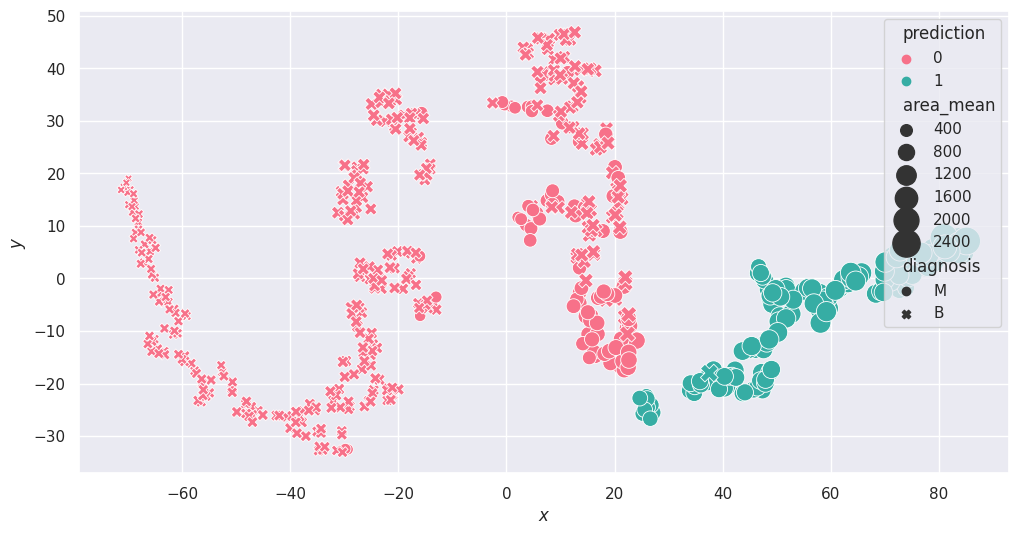

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

with sns.plotting_context("notebook", font_scale=1):
        sns.scatterplot(x='x',
                        y='y',
                        hue='prediction',
                        size='area_mean',
                        style='diagnosis',
                        sizes=(30, 400),
                        palette=sns.color_palette("husl", 2),
                        data=kmdff,
                        ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

El resultado es bastante preciso para y < -20, pero el algoritmo no es capaz de incluir tambi√©n los puntos en el l√≠mite (y ‚âà 0) en el cl√∫ster maligno principal. Esto se debe principalmente a la no convexidad de los conjuntos originales y es muy dif√≠cil resolver el problema utilizando K-means. Adem√°s, en la proyecci√≥n, la mayor√≠a de las muestras malignas con y ‚âà 0 se mezclan con las benignas, por lo que la probabilidad de error tambi√©n es alta con otros m√©todos basados en la proximidad.

‚úÖ Paso 3 - M√©tricas de evaluaci√≥n

Comprender el rendimiento de los m√©todos de aprendizaje no supervisado es inherentemente mucho m√°s dif√≠cil que los m√©todos de aprendizaje supervisado porque, a menudo, no hay una soluci√≥n "mejor" clara y definitiva. Para el aprendizaje supervisado, existen muchas m√©tricas de rendimiento robustas, siendo la m√°s directa de estas la precisi√≥n, que implica comparar las etiquetas predichas por el modelo con las etiquetas reales y ver cu√°ntas el modelo acert√≥. Desafortunadamente, para el agrupamiento (clustering), no tenemos etiquetas en las que confiar y debemos desarrollar una comprensi√≥n de cu√°n "diferentes" son nuestros conglomerados.

‚û°Ô∏è `Inertia`:  La forma m√°s sencilla de evaluar el rendimiento de K-means y elegir un n√∫mero apropiado de clusters se basa en la comparaci√≥n de diferentes inercias finales. La "inercia" se refiere a una m√©trica que se utiliza para evaluar la calidad del agrupamiento o la dispersi√≥n de los puntos de datos en un cluster. En otras palabras, la inercia mide cu√°nto est√°n dispersos los puntos de datos dentro de un cluster.

F√≥rmula:

```
Inertia = ‚àë (Distancia Media al Centroide en cada Cluster)
```
Donde:

*   Para cada cl√∫ster en el conjunto de datos, se calcula la distancia media entre todas las muestras dentro del cl√∫ster y el centroide de ese cl√∫ster. La distancia media se calcula utilizando la distancia euclidiana, que es una medida com√∫n en el contexto de K-means. La distancia euclidiana entre dos puntos (vectores) se calcula como la ra√≠z cuadrada de la suma de las diferencias cuadradas entre sus coordenadas.
*   Se suman todas estas distancias medias de cada cl√∫ster.
*   El resultado es el valor de la inercia.

En un buen agrupamiento, los puntos de datos dentro de un cluster deben estar cerca de su centroide, lo que da como resultado una inercia baja. Por otro lado, en un mal agrupamiento, los puntos de datos pueden estar dispersos lejos de su centroide, lo que da como resultado una inercia alta.

En resumen, la inercia es una medida que eval√∫a cu√°n compactos y cercanos est√°n los puntos de datos dentro de un cl√∫ster, y se utiliza para ayudar a determinar el n√∫mero adecuado de cl√∫steres en un algoritmo de agrupamiento como K-Means.

In [ ]:
# Inertia como funci√≥n del n√∫mero de clusters

inertias = []

for i in range(2, 51):
    km = KMeans(n_clusters=i, max_iter=1000, random_state=1000)
    km.fit(cdf)
    inertias.append(km.inertia_)

Cuando se trabaja con K-Means para determinar el n√∫mero √≥ptimo de clusters, se calcula la inercia para diferentes valores de K (n√∫mero de clusters) y se busca un punto de inflexi√≥n en la curva de la inercia en funci√≥n de K. El n√∫mero de cl√∫steres en el que la disminuci√≥n en la inercia se vuelve menos significativa puede considerarse un buen candidato para el n√∫mero √≥ptimo de cl√∫steres.

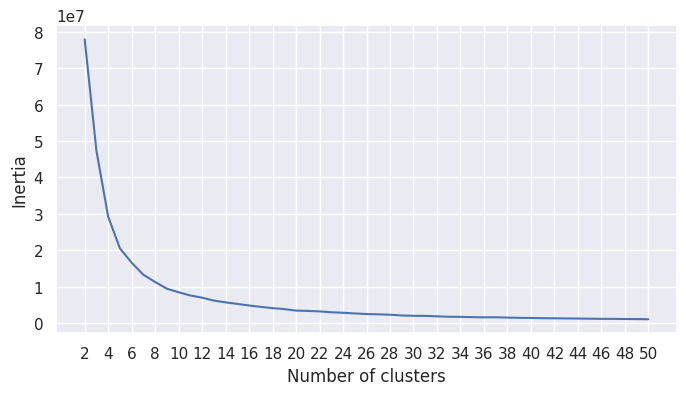

In [ ]:
# Inertia VS numero de clusters
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(np.arange(2, 51, 1), inertias)
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
ax.set_xticks(np.arange(2, 51, 2))

plt.show()

En este caso, el diagn√≥stico sugiere que deber√≠amos agrupar en dos grupos correspondientes a los diagn√≥sticos. Sin embargo, el gr√°fico muestra un descenso dr√°stico que termina en K=8 y contin√∫a con una pendiente m√°s baja hasta alrededor de K=40. Durante el an√°lisis preliminar, hemos visto que la proyecci√≥n bidimensional est√° compuesta por muchas manchas aisladas que comparten el mismo diagn√≥stico. Por lo tanto, podr√≠amos decidir utilizar, por ejemplo, K=8 y analizar las caracter√≠sticas correspondientes a cada cl√∫ster. Dado que no se trata de una tarea de clasificaci√≥n, el diagn√≥stico puede utilizarse como la principal referencia, pero un an√°lisis exploratorio correcto puede intentar comprender la composici√≥n de las subestructuras para proporcionar m√°s detalles a los t√©cnicos (por ejemplo, m√©dicos).

‚û°Ô∏è `Silhouette Score()`: La m√©trica de Silueta funciona analizando qu√© tan bien se ajusta un punto dentro de su conglomerado.

F√≥rmula:
```
S(i)= b(i)‚àía(i)/(max(a(i),b(i))
```
Donde:

*   S(i) es el puntaje Silhouette para el punto i.
*   a(i) es la distancia promedio de i a todos los dem√°s puntos en el mismo cl√∫ster.
*   b(i) es la distancia promedio de i a todos los puntos en el cl√∫ster m√°s cercano distinto del que i pertenece.

El puntaje Silhouette se calcula para cada punto en el conjunto de datos, y el puntaje Silhouette promedio se utiliza para evaluar la calidad general del agrupamiento. El puntaje Silhouette est√° en el rango de -1 a 1, donde un puntaje m√°s alto indica que los puntos est√°n bien agrupados y tienen una distancia significativamente mayor entre cl√∫steres en comparaci√≥n con la distancia dentro del cl√∫ster.

Tambi√©n podemos utilizar las Puntuaciones de Silueta para encontrar el n√∫mero √≥ptimo de "K" conglomerados para nuestros m√©todos de aprendizaje no supervisado.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# Calcula el silhouette_score
SS_1 = silhouette_score(cdf, Y_pred)

# Imprime el resultado
print("Silhouette Score:", SS_1)

Silhouette Score: 0.6972646156059465


El resultado sugiere que los cl√∫steres son bastante homog√©neos y est√°n bien separados, lo que es una indicaci√≥n positiva de que el algoritmo de K-Means ha funcionado bien en la agrupaci√≥n de tus datos en dos cl√∫steres. Sin embargo, para una evaluaci√≥n completa, es recomendable probar con diferentes valores de K y comparar los Silhouette Scores para determinar el n√∫mero √≥ptimo de cl√∫steres para tu conjunto de datos.

‚û°Ô∏è `Completeness score`: Es una m√©trica de evaluaci√≥n utilizada en problemas de agrupamiento (clustering) para medir cu√°ntos de los puntos de datos que pertenecen a una misma clase en los datos originales tambi√©n se agrupan juntos en el mismo cl√∫ster despu√©s de aplicar un algoritmo de agrupamiento.

La completitud se refiere a la capacidad del algoritmo de agrupamiento para capturar todas las muestras que pertenecen a una misma clase en el conjunto de datos original. En otras palabras, mide si todos los puntos de datos que comparten una etiqueta de clase en los datos originales est√°n agrupados juntos en un solo cl√∫ster.

F√≥rmula:

```
Completeness Score = Œ£ [H(Ci) / N]
```
Donde:

*   Œ£ representa la suma sobre todos los cl√∫steres Ci.
*   H(Ci) es la entrop√≠a de las muestras en el cl√∫ster Ci en relaci√≥n con las clases reales (etiquetas verdaderas de clase). La entrop√≠a mide cu√°nta incertidumbre hay en la distribuci√≥n de las clases dentro del cl√∫ster. Cuanto m√°s concentradas est√©n las clases en un cl√∫ster, menor ser√° la entrop√≠a.
*   N es el n√∫mero total de muestras en el conjunto de datos.

Un puntaje de completitud cercano a 1.0 indica que el algoritmo de agrupamiento ha tenido √©xito en agrupar todas las muestras de una misma clase en un solo cl√∫ster, mientras que un puntaje m√°s bajo indica que algunas muestras de la misma clase se han distribuido en diferentes cl√∫steres.

In [ ]:
from sklearn.metrics import completeness_score

In [ ]:
CS_1 = completeness_score(kmdff['diagnosis'], kmdff['prediction'])
print('Completeness: {}'.format(CS_1))

Completeness: 0.5168089972809706


Este resultado confirma que, para K=2, K-means no es capaz de separar perfectamente los cl√∫steres, ya que, como hemos visto, hay algunas muestras malignas que se asignan incorrectamente al cl√∫ster que contiene la gran mayor√≠a de las muestras benignas. Sin embargo, dado que c no es extremadamente peque√±o, podemos estar seguros de que la mayor√≠a de las muestras de ambas clases se han asignado a diferentes cl√∫steres.

‚û°Ô∏è `Homogeneity score`: El puntaje de homogeneidad (homogeneity score) es una m√©trica complementaria a las mencionadas anteriormente y se basa en la suposici√≥n de que un cl√∫ster debe contener solo muestras que tengan la misma etiqueta verdadera.

En otras palabras, la homogeneidad mide qu√© tan bien un algoritmo de agrupamiento puede agrupar muestras que realmente pertenecen a la misma clase en el conjunto de datos original. Un puntaje de homogeneidad cercano a 1.0 indica que los cl√∫steres son altamente homog√©neos, es decir, cada cl√∫ster contiene principalmente muestras de una sola clase. En cambio, un puntaje m√°s bajo sugiere que los cl√∫steres son menos homog√©neos y que pueden contener muestras de diferentes clases.

La homogeneidad se calcula utilizando la informaci√≥n de las etiquetas reales de las muestras y las etiquetas de cl√∫steres asignadas por el algoritmo de agrupamiento. Cuanto m√°s similar sea la etiqueta de cl√∫ster de una muestra a la etiqueta real de su clase, mayor ser√° el puntaje de homogeneidad.

El c√°lculo del puntaje de homogeneidad se basa en la entrop√≠a condicional y la informaci√≥n mutua entre las etiquetas de clase reales y las etiquetas de cl√∫ster. Un puntaje de homogeneidad alto indica una buena capacidad del algoritmo de agrupamiento para agrupar muestras correctamente seg√∫n sus etiquetas de clase reales.

F√≥rmula:

```
Homogeneity Score = 1 - H(U|C) / H(U)
```

Donde:

*   H(U|C) es la entrop√≠a condicional de las muestras en funci√≥n de las clases reales (etiquetas verdaderas de clase) dada la asignaci√≥n a los cl√∫steres. Cuanto menor sea la entrop√≠a condicional, mayor ser√° la homogeneidad.
*   H(U) es la entrop√≠a de las clases reales en el conjunto de datos completo.

El resultado de esta m√©trica est√° en el rango [0, 1], donde un puntaje de homogeneidad de 1.0 indica que los cl√∫steres son perfectamente homog√©neos en t√©rminos de clases, es decir, cada cl√∫ster contiene muestras de una sola clase. Un puntaje m√°s bajo indica una menor homogeneidad y sugiere que las muestras de una misma clase pueden estar dispersas en varios cl√∫steres.

La puntuaci√≥n de homogeneidad se utiliza para evaluar cu√°n bien los cl√∫steres reflejan la estructura real de clases en el conjunto de datos. Junto con la puntuaci√≥n de completitud y otras m√©tricas, proporciona una visi√≥n m√°s completa de la calidad de la agrupaci√≥n.


In [ ]:
from sklearn.metrics import homogeneity_score

In [ ]:
HS_1 = homogeneity_score(kmdff['diagnosis'], kmdff['prediction'])
print('Homogeneity: {}'.format(HS_1))

Homogeneity: 0.42229071246999117


Este valor (en particular, para K=2) confirma nuestro an√°lisis inicial. Al menos un cl√∫ster (el que contiene la mayor√≠a de las muestras benignas) no es completamente homog√©neo, ya que contiene muestras pertenecientes a ambas clases. Sin embargo, como el valor no est√° muy cerca de 0, podemos estar seguros de que las asignaciones son parcialmente correctas. Considerando ambos valores, h (homogeneidad) y c (completitud), podemos deducir que K-means no est√° funcionando extremadamente bien (probablemente debido a la no convexidad), pero, al mismo tiempo, es capaz de separar correctamente todas aquellas muestras cuya distancia al cl√∫ster m√°s cercano est√° por encima de un umbral espec√≠fico. Cabe mencionar que, con conocimiento de la verdad absoluta (las etiquetas reales de las muestras), no podemos aceptar f√°cilmente el rendimiento de K-means y debemos buscar otro algoritmo que sea capaz de obtener tanto h como c ‚Üí 1.

‚û°Ô∏è `V-measure`: La m√©trica "V-Measure" es una m√©trica de evaluaci√≥n utilizada en problemas de agrupamiento (clustering) que combina la homogeneidad (homogeneity) y la completitud (completeness) para proporcionar una medida global de la calidad de los cl√∫steres. La V-Measure mide la similitud entre las etiquetas reales de clase y las etiquetas de cl√∫ster asignadas por un algoritmo de agrupamiento.

F√≥rmula:

```
V-Measure = (2 * homogeneity * completeness) / (homogeneity + completeness)
```

Donde:

*   Homogeneidad (homogeneity) mide la capacidad del algoritmo de agrupamiento para agrupar muestras que pertenecen a la misma clase en el conjunto de datos original.
*   Completitud (completeness) mide la capacidad del algoritmo de agrupamiento para capturar todas las muestras que pertenecen a una misma clase en el conjunto de datos original.

La V-Measure toma valores en el rango de 0 a 1, donde un valor m√°s alto indica una mejor calidad de los cl√∫steres. Un valor de 1 significa que los cl√∫steres son perfectamente coherentes con las etiquetas de clase reales, mientras que un valor de 0 indica que no hay concordancia entre los cl√∫steres y las etiquetas de clase.

La V-Measure es una m√©trica √∫til porque considera tanto la homogeneidad como la completitud, lo que la hace m√°s completa que las m√©tricas individuales por separado. Ayuda a evaluar cu√°n bien los cl√∫steres capturan la estructura de las clases en los datos, y es especialmente √∫til cuando las clases son desequilibradas o cuando se desea una medida global de calidad de agrupamiento.

In [ ]:
from sklearn.metrics import v_measure_score

In [ ]:
VS_1 = v_measure_score(kmdff['diagnosis'], kmdff['prediction'])
print('V-Score: {}'.format(VS_1))

V-Score: 0.46479332792160793


El puntaje V (V-Score o V-Measure) es, como se esperaba, una medida promedio que en este caso se ve negativamente influenciada por una homogeneidad m√°s baja. Por supuesto, este √≠ndice no proporciona informaci√≥n diferente, por lo tanto, solo es √∫til para resumir completitud y homogeneidad en un solo valor. Sin embargo, con algunas manipulaciones matem√°ticas simples pero tediosas, es posible demostrar que la V-Measure tambi√©n es sim√©trica (es decir, V(Y_pred|Y_true) = V(Y_true|Y_pred)); por lo tanto, dadas dos asignaciones independientes Y1 e Y2, V(Y1|Y2) es una medida de acuerdo entre ellas. Este escenario no es extremadamente com√∫n, ya que otras medidas pueden lograr un mejor resultado. Sin embargo, este puntaje podr√≠a utilizarse, por ejemplo, para verificar si dos algoritmos (posiblemente basados en estrategias diferentes) tienden a producir las mismas asignaciones o si son discordantes. En el √∫ltimo caso, incluso si la verdad absoluta es desconocida, el cient√≠fico de datos puede entender que una estrategia no es tan efectiva como la otra y comenzar un proceso de exploraci√≥n para encontrar el algoritmo de agrupamiento √≥ptimo.

‚û°Ô∏è `Adjusted Mutual Information (AMI) score`: Puntuaci√≥n de Informaci√≥n Mutua Ajustada, es una m√©trica de evaluaci√≥n utilizada en problemas de agrupamiento (clustering) que mide la similitud entre las etiquetas reales de clase y las etiquetas de cl√∫ster asignadas por un algoritmo de agrupamiento. El AMI es una m√©trica que ajusta la Informaci√≥n Mutua (MI) para corregir posibles problemas de normalizaci√≥n y escala.

La AMI se basa en la teor√≠a de la informaci√≥n y calcula cu√°nta informaci√≥n compartida hay entre las etiquetas de clase reales y las etiquetas de cl√∫ster. Proporciona una medida de cu√°n bien el algoritmo de agrupamiento ha logrado capturar la estructura subyacente de las clases en los datos.

F√≥rmula:

```
AMI = [I(C; K) - E(I(C; K))] / [max(H(C), H(K)) - E(I(C; K))]
```
Donde:
*   I(C; K) es la informaci√≥n mutua entre las etiquetas reales de clase (C) y las asignaciones de cl√∫ster (K). La informaci√≥n mutua mide cu√°nta informaci√≥n compartida hay entre las dos distribuciones.
*   E(I(C; K)) es la esperanza de la informaci√≥n mutua bajo la suposici√≥n de que las asignaciones de cl√∫ster son asignadas al azar.
*   H(C) es la entrop√≠a de las etiquetas reales de clase.
*   H(K) es la entrop√≠a de las asignaciones de cl√∫ster.

El resultado de la AMI es un valor que est√° en el rango [-1, 1]. Un valor de 1 indica una perfecta concordancia entre las etiquetas de clase y las asignaciones de cl√∫ster, mientras que un valor de -1 indica una discordancia total. Un valor de 0 sugiere que las asignaciones de cl√∫ster son independientes de las etiquetas de clase, es decir, no hay informaci√≥n compartida.

La puntuaci√≥n de AMI es √∫til porque tiene en cuenta tanto la informaci√≥n compartida como las posibles coincidencias aleatorias, lo que la hace robusta y adecuada para evaluar algoritmos de agrupamiento en una variedad de situaciones.

El AMI es especialmente √∫til cuando se desea una medida de evaluaci√≥n que tenga en cuenta la posibilidad de asignaciones aleatorias, lo que lo hace adecuado para problemas de agrupamiento con un n√∫mero variable de cl√∫steres o tama√±os de cl√∫steres desiguales.

In [ ]:
from sklearn.metrics import adjusted_mutual_info_score

In [ ]:
AMI_1 = adjusted_mutual_info_score(kmdff['diagnosis'], kmdff['prediction'])
print('Adj. Mutual info: {}'.format(AMI_1))

Adj. Mutual info: 0.4640047128452087


El acuerdo es moderado y compatible con la otra medida. Suponiendo la presencia de permutaciones y la posibilidad de asignaciones al azar, Y_true y Y_pred comparten un nivel medio de informaci√≥n porque, como hemos discutido, K-means es capaz de asignar correctamente todas las muestras donde la probabilidad de superposici√≥n es despreciable, mientras tiende a considerar benignas muchas muestras malignas que est√°n en el l√≠mite entre los dos cl√∫steres (por el contrario, no comete asignaciones incorrectas para las muestras benignas). Sin ninguna indicaci√≥n adicional, este √≠ndice sugiere tambi√©n verificar otros algoritmos de agrupamiento que pueden manejar cl√∫steres no convexos, porque la falta de informaci√≥n compartida se debe principalmente a la imposibilidad de capturar geometr√≠as complejas utilizando bolas est√°ndar (especialmente en el subespacio donde la superposici√≥n es m√°s significativa).

‚û°Ô∏è `Adjusted Rand score`: Es una m√©trica para medir la similitud entre las etiquetas reales de clase y las etiquetas de cl√∫ster asignadas por un algoritmo de agrupamiento. El puntaje ajustado de Rand ajusta el √≠ndice de Rand est√°ndar para corregir posibles problemas de normalizaci√≥n y escala.

El √≠ndice de Rand compara todas las parejas de muestras y mide cu√°ntas de ellas se agrupan de la misma manera tanto en las etiquetas reales como en las etiquetas de cl√∫ster. Sin embargo, el problema con el √≠ndice de Rand est√°ndar es que puede dar valores m√°s altos simplemente debido al azar o al n√∫mero de cl√∫steres, lo que hace que la interpretaci√≥n sea complicada.

El puntaje ajustado de Rand corrige este problema y proporciona una medida m√°s confiable de la similitud entre las etiquetas de cl√∫ster y las etiquetas de clase. Se calcula mediante la siguiente f√≥rmula:

F√≥rmula:
```
ARI = RI‚àíExpected_RI/(max(RI)‚àíExpected_RI )
```
Donde:

*   RI (Rand Index) es el √≠ndice de Rand, que mide la similitud entre las etiquetas reales de clase y las asignaciones de cl√∫ster. El √≠ndice de Rand se calcula como la suma de los pares de muestras que son iguales tanto en las etiquetas reales de clase como en las asignaciones de cl√∫ster, dividido por el n√∫mero total de pares de muestras.
*   Expected_RI (Expected Rand Index) es el √≠ndice de Rand esperado bajo la suposici√≥n de que las asignaciones de cl√∫ster se hacen al azar.


El puntaje ajustado de Rand toma valores en el rango de -1 a 1. Un valor positivo indica que las etiquetas de cl√∫ster y las etiquetas de clase est√°n m√°s relacionadas de lo que se esperar√≠a al azar, mientras que un valor negativo sugiere que las etiquetas de cl√∫ster y las etiquetas de clase est√°n menos relacionadas de lo que se esperar√≠a al azar. Un valor de 0 significa que no hay una relaci√≥n significativa entre las etiquetas de cl√∫ster y las etiquetas de clase.

El puntaje ajustado de Rand es √∫til cuando se desea una medida de evaluaci√≥n que tenga en cuenta la posibilidad de asignaciones aleatorias, lo que lo hace adecuado para problemas de agrupamiento con un n√∫mero variable de cl√∫steres o tama√±os de cl√∫steres desiguales. Proporciona una evaluaci√≥n m√°s confiable de la calidad del agrupamiento que el √≠ndice de Rand est√°ndar.

In [ ]:
from sklearn.metrics import adjusted_rand_score

In [ ]:
ARI_1 = adjusted_rand_score(kmdff['diagnosis'], kmdff['prediction'])
print('Adj. Rand score: {}'.format(ARI_1))

Adj. Rand score: 0.49142453622455523


Este resultado es mejor que los otros √≠ndices, ya que el valor es mayor que -1 (extremo negativo). Confirma que la discrepancia entre las distribuciones no es muy pronunciada y se debe principalmente a un subconjunto limitado de muestras. Este puntaje es muy confiable y puede utilizarse tambi√©n como una √∫nica m√©trica para evaluar el rendimiento de un algoritmo de agrupamiento. Un valor cercano a 0.5 confirma que es poco probable que K-means sea la soluci√≥n √≥ptima, pero al mismo tiempo, que el conjunto de datos tiene una geometr√≠a que puede capturarse casi por completo mediante bolas sim√©tricas, excepto en algunas regiones no convexas con una alta probabilidad de superposici√≥n.

‚û°Ô∏è `Matriz de Contingencia`: Tabla bidimensional que se utiliza para comparar las etiquetas reales de clase con las etiquetas predichas por un algoritmo. Esta matriz es especialmente √∫til cuando se desea evaluar la calidad de un modelo de clasificaci√≥n o un algoritmo de agrupamiento en funci√≥n de su capacidad para asignar correctamente las muestras a las clases reales.

En una matriz de contingencia, las filas representan las etiquetas reales de clase, mientras que las columnas representan las etiquetas predichas por el algoritmo. Cada celda de la matriz contiene el n√∫mero de muestras que pertenecen a una determinada combinaci√≥n de etiqueta real y etiqueta predicha. Las dos etiquetas principales que se utilizan en una matriz de contingencia son:

Etiqueta real: Representa la clase a la que pertenece cada muestra en los datos reales. Es la verdad absoluta o la "respuesta correcta".

Etiqueta predicha: Representa la clase a la que un algoritmo de agrupamiento o clasificaci√≥n asigna cada muestra.

La matriz de contingencia permite calcular diversas m√©tricas de evaluaci√≥n, como el √çndice de Rand, la Informaci√≥n Mutua, la Homogeneidad y la Completitud, entre otras. Estas m√©tricas se utilizan para medir la similitud entre las etiquetas reales y las etiquetas predichas y evaluar qu√© tan bien el modelo o algoritmo ha asignado las muestras a las clases correctas.

En resumen, una matriz de contingencia es una herramienta fundamental en la evaluaci√≥n de la calidad de un modelo de clasificaci√≥n o un algoritmo de agrupamiento al proporcionar una representaci√≥n tabular de las asignaciones de etiquetas y permitir el c√°lculo de m√©tricas de evaluaci√≥n que cuantifican la calidad de las asignaciones.

In [ ]:
from sklearn.metrics.cluster import contingency_matrix

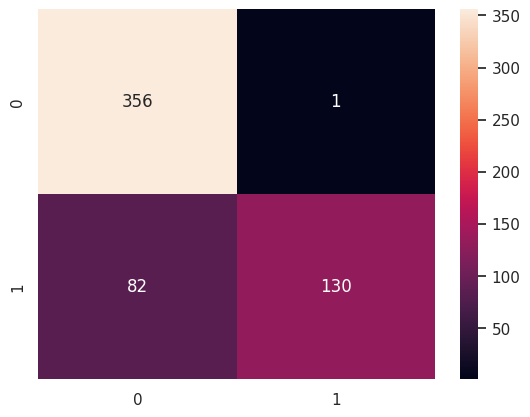

In [ ]:
# Compute and show the contingency matrix
matrix = contingency_matrix(kmdff['diagnosis'].apply(lambda x: 0 if x == 'B' else 1), kmdff['prediction'])

fig, ax = plt.subplots()

with sns.plotting_context("notebook"):
  sns.heatmap(matrix, annot=True, fmt='d', ax=ax)

plt.show()

Este resultado muestra que casi todas las muestras benignas han sido agrupadas correctamente, mientras que un porcentaje moderado de las malignas ha sido asignado err√≥neamente al primer cl√∫ster. Ya hemos tenido confirmaci√≥n utilizando otras m√©tricas, pero, de manera an√°loga a la matriz de confusi√≥n en tareas de clasificaci√≥n, una matriz de contingencia permite la visualizaci√≥n inmediata de qu√© clases son las m√°s dif√≠ciles de separar, ayudando al cient√≠fico de datos a buscar una soluci√≥n m√°s efectiva.

### **Modelo 2**

‚úÖ Paso 1 - Modelo

In [ ]:
km2 = KMeans(n_clusters=8, max_iter=1000, random_state=1000)

‚úÖ Paso 2 - Predicci√≥n

In [ ]:
Y_pred = km2.fit_predict(cdf)

df_km = pd.DataFrame(Y_pred, columns=['prediction'], index=cdf.index)
kmdff = pd.concat([dff, df_km], axis=1)

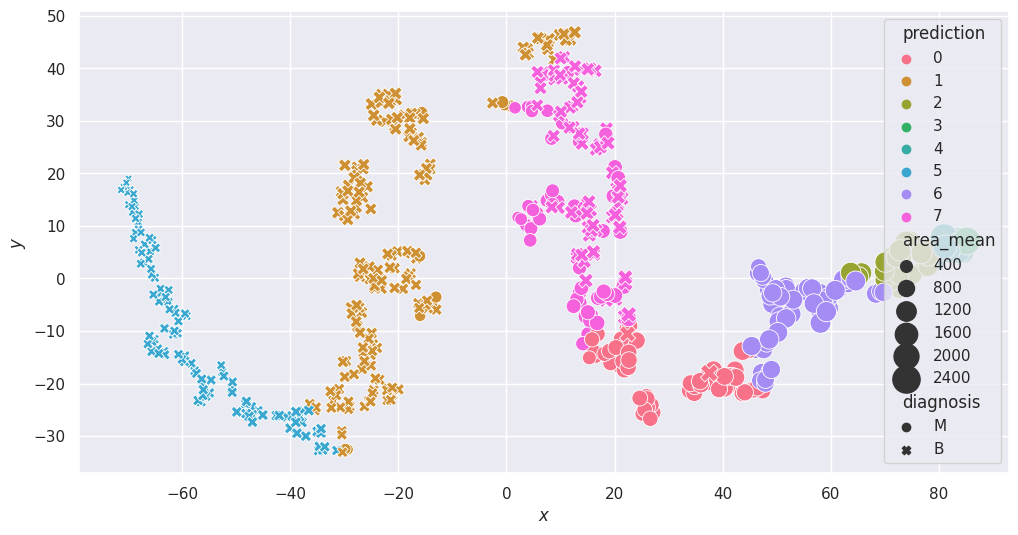

In [ ]:
# Show the result
fig, ax = plt.subplots(figsize=(12, 6))

with sns.plotting_context("notebook", font_scale=1):
        sns.scatterplot(x='x',
                        y='y',
                        hue='prediction',
                        size='area_mean',
                        style='diagnosis',
                        sizes=(30, 400),
                        palette=sns.color_palette("husl", 8),
                        data=kmdff,
                        ax=ax)

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

plt.show()

‚úÖ Paso 3 - M√©tricas de evaluaci√≥n

In [ ]:
SS_2 = silhouette_score(cdf, Y_pred)
CS_2 = completeness_score(kmdff['diagnosis'], kmdff['prediction'])
HS_2 = homogeneity_score(kmdff['diagnosis'], kmdff['prediction'])
VS_2 = v_measure_score(kmdff['diagnosis'], kmdff['prediction'])
AMI_2 = adjusted_mutual_info_score(kmdff['diagnosis'], kmdff['prediction'])
ARI_2 = adjusted_rand_score(kmdff['diagnosis'], kmdff['prediction'])

print("Silhouette Score:", SS_2)
print('Completeness: {}'.format(CS_2))
print('Homogeneity: {}'.format(HS_2))
print('V-Score: {}'.format(VS_2))
print('Adj. Mutual info: {}'.format(AMI_2))
print('Adj. Rand score: {}'.format(ARI_2))

Silhouette Score: 0.4645725087478533
Completeness: 0.24665834788923496
Homogeneity: 0.6394546378370277
V-Score: 0.35599709531334006
Adj. Mutual info: 0.3524286954955857
Adj. Rand score: 0.23519533273020504


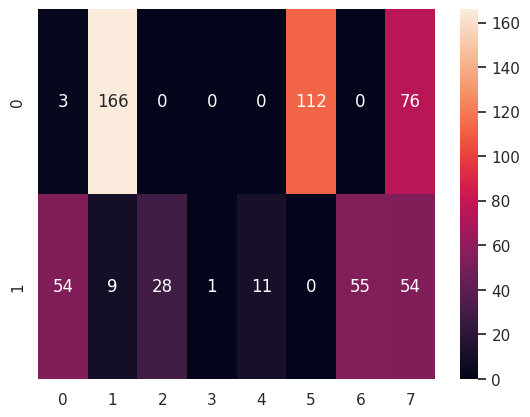

In [ ]:
# Compute and show the contingency matrix
matrix = contingency_matrix(kmdff['diagnosis'].apply(lambda x: 0 if x == 'B' else 1), kmdff['prediction'])

fig, ax = plt.subplots()

with sns.plotting_context("notebook"):
  sns.heatmap(matrix, annot=True, fmt='d', ax=ax)

plt.show()

   üü†  ¬°Ahora es tu turno de interpretar los resultados!  üü†